In [ ]:
The Battle of the Neighborhoods - Week 2-3
Part 3 Explore New York city and its Boroughs Cuisine

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  2.1.0
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py35_0 conda-forge

wordcloud-1.4. 100% |################################| Time: 0:00:00  45.93 MB/s
Wordcloud is installed and imported!


In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_268aa9cdab704074ad982b91f8ed4f1a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='zvUG8_oB2yImhcPYP_bZglylgn9LZ6ojtGTM6In_eS23',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_268aa9cdab704074ad982b91f8ed4f1a.get_object(Bucket='couseracapstone-donotdelete-pr-hsjoqugnmivqhr',Key='NYC_Cuisine.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

NYC_CUISINE = pd.read_csv(body)
NYC_CUISINE.head()

,Borough,Neighborhood,Cuisine,Latitude,Longitude,Zipcodes,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean",40.870,-73.886,"10458, 10468",NaN,NaN,NaN
1,The Bronx,Belmont,"Italian, Albanian",40.855,-73.886,"10457,10458, 10460",NaN,NaN,NaN
2,The Bronx,City Island,"Italian, Seafood",40.848,-73.786,NaN,NaN,NaN,NaN
3,The Bronx,Morris Park,"Italian, Albanian",40.852,73.853,"10461, 10462",NaN,NaN,NaN
4,The Bronx,Norwood,Filipino,40.878,-73.878,10467,NaN,NaN,NaN


In [3]:
NYC_CUISINE.shape

(61, 9)

In [4]:
print(NYC_CUISINE.Borough.unique())

['The Bronx' 'Queens' 'Manhattan' 'Staten Island' 'Brooklyn']


In [5]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,17
Manhattan,11
The Bronx,9
Staten Island,5


In [6]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [7]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [8]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

In [9]:
stopwords = set(STOPWORDS)

In [10]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

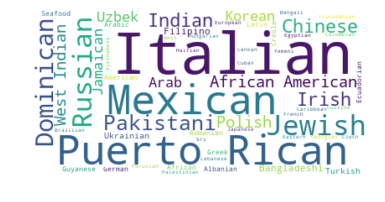

In [11]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [ ]:
Most Preferred Food in New York City

1.Italian
2.Purto Rican
3.Mexican
4.Jewish
5.Indian
6.Pakistani
7.Dominican

In [12]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine,Latitude,Longitude,Zipcodes,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pal...",NaN,NaN,NaN,NaN,NaN,NaN
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert...",NaN,NaN,NaN,NaN,NaN,NaN
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U...",NaN,NaN,NaN,NaN,NaN,NaN
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese",NaN,NaN,NaN,NaN,NaN,NaN
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani, Ukrainian",NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pal..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani, Ukrainian"
5,"Puerto Rican, Mexican, Dominican, Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, Puerto Rican"


In [14]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [15]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [16]:
stopwords = set(STOPWORDS)

In [17]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

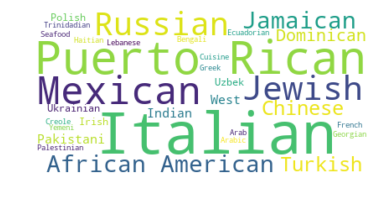

In [18]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [19]:
Most Preferred Food in Brooklyn is -

1.Italian
2.Jewish
3.Mexican
4.Puerto Rican

SyntaxError: invalid syntax (<ipython-input-19-d79f563830bf>, line 1)

In [20]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine,Latitude,Longitude,Zipcodes,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E...",NaN,NaN,NaN,NaN,NaN,NaN
1,Queens,Bellerose,"Indian, Pakistani",NaN,NaN,NaN,NaN,NaN,NaN
2,Queens,Flushing,"Chinese, Korean",NaN,NaN,NaN,NaN,NaN,NaN
3,Queens,Forest Hills,"Jewish, Russian, Uzbek",NaN,NaN,NaN,NaN,NaN,NaN
4,Queens,Kew Gardens,"Jewish, Russian, Uzbek",NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,"Indian, Pakistani"
2,"Chinese, Korean"
3,"Jewish, Russian, Uzbek"
4,"Jewish, Russian, Uzbek"
5,"Jewish, Russian, Uzbek"
6,Italian
7,Italian
8,"German, Polish"
9,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."


In [22]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [23]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [24]:
stopwords = set(STOPWORDS)

In [25]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

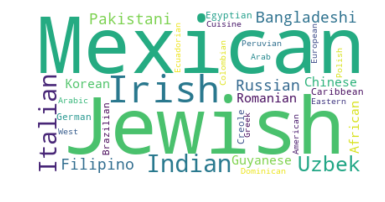

In [26]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [ ]:
Most Preferred Food in Queens

1.Jewish
2.Italian
3.Indian
4.Irish

In [27]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine,Latitude,Longitude,Zipcodes,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Manhattan,Chinatown,"Chinese, Vietnamese",NaN,NaN,NaN,NaN,NaN,NaN
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuba...",NaN,NaN,NaN,NaN,NaN,NaN
2,Manhattan,East Village,"Japanese, Korean, Indian, Ukrainian",NaN,NaN,NaN,NaN,NaN,NaN
3,Manhattan,Greenwich Village,Italian,NaN,NaN,NaN,NaN,NaN,NaN
4,Manhattan,Harlen,"Italian, African-American, Latin American, Wes...",NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,"Chinese, Vietnamese"
1,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,"Japanese, Korean, Indian, Ukrainian"
3,Italian
4,"Italian, African-American, Latin American, Wes..."
5,Korean
6,Italian
7,"Puerto Rican, Jewish, Italian, Latin American"
8,"Indian, Pakistani, Bangladeshi"
9,"Dominican, Puerto Rican, Italian, Jewish"


In [29]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [30]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [31]:
stopwords = set(STOPWORDS)

In [32]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

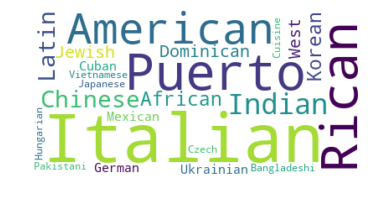

In [33]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [ ]:
Most Preferred Food in Manhattan 

Italian
American
Puerto Rican
Indian

In [34]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine,Latitude,Longitude,Zipcodes,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean",40.870,-73.886,"10458, 10468",NaN,NaN,NaN
1,The Bronx,Belmont,"Italian, Albanian",40.855,-73.886,"10457,10458, 10460",NaN,NaN,NaN
2,The Bronx,City Island,"Italian, Seafood",40.848,-73.786,NaN,NaN,NaN,NaN
3,The Bronx,Morris Park,"Italian, Albanian",40.852,73.853,"10461, 10462",NaN,NaN,NaN
4,The Bronx,Norwood,Filipino,40.878,-73.878,10467,NaN,NaN,NaN


In [35]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [36]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [37]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [38]:
stopwords = set(STOPWORDS)

In [39]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

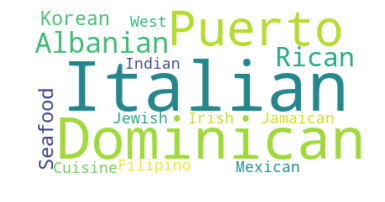

In [40]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [ ]:
Most Preferred Food in The Bronx 

1.Italian
2.Albanian
3.Dominican
4.Puerto Rican

In [41]:
StatenIsland_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Staten Island'].reset_index(drop=True)
StatenIsland_data.head()

,Borough,Neighborhood,Cuisine,Latitude,Longitude,Zipcodes,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Staten Island,Tompkinsville,"Italian, Sri Lankan, Pakistani, Indian",NaN,NaN,NaN,NaN,NaN,NaN
1,Staten Island,Rossville,"Italian, Russian, Arab, Polish",NaN,NaN,NaN,NaN,NaN,NaN
2,Staten Island,South Beach,"Italian, Russian, Arab, Polish",NaN,NaN,NaN,NaN,NaN,NaN
3,Staten Island,Great Kills,"Italian, Russian, Arab, Polish",NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island,Port Richmond,"Mexican, Indian, Italian",NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
SI_CUISINE_WC = StatenIsland_data[['Cuisine']]
SI_CUISINE_WC

,Cuisine
0,"Italian, Sri Lankan, Pakistani, Indian"
1,"Italian, Russian, Arab, Polish"
2,"Italian, Russian, Arab, Polish"
3,"Italian, Russian, Arab, Polish"
4,"Mexican, Indian, Italian"


In [43]:
SI_CUISINE_WC.to_csv('SI_CUISINE.txt', sep=',', index=False)

In [44]:
SI_CUISINE_WC = open('SI_CUISINE.txt', 'r').read()

In [45]:
stopwords = set(STOPWORDS)

In [46]:
# instantiate a word cloud object
SI_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
SI_CUISINE_NYC.generate(SI_CUISINE_WC)

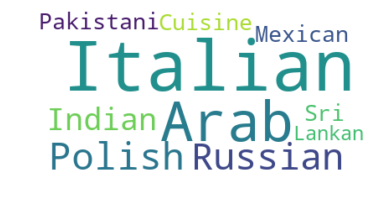

In [47]:
# display the word cloud
plt.imshow(SI_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()